<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Expression-Quality-Control-(Part-2)" data-toc-modified-id="Expression-Quality-Control-(Part-2)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Expression Quality Control (Part 2)</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Inputs" data-toc-modified-id="Inputs-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Inputs</a></span></li><li><span><a href="#Load-expression-data" data-toc-modified-id="Load-expression-data-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Load expression data</a></span></li><li><span><a href="#Load-metadata" data-toc-modified-id="Load-metadata-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Load metadata</a></span></li></ul></li><li><span><a href="#Remove-samples-due-to-poor-metadata" data-toc-modified-id="Remove-samples-due-to-poor-metadata-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Remove samples due to poor metadata</a></span><ul class="toc-item"><li><span><a href="#Check-curation" data-toc-modified-id="Check-curation-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Check curation</a></span></li><li><span><a href="#Remove-samples-with-only-one-replicate" data-toc-modified-id="Remove-samples-with-only-one-replicate-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Remove samples with only one replicate</a></span></li><li><span><a href="#Save-this-information-to-the-full-metadata-dataframe" data-toc-modified-id="Save-this-information-to-the-full-metadata-dataframe-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Save this information to the full metadata dataframe</a></span></li></ul></li><li><span><a href="#Check-correlations-between-replicates" data-toc-modified-id="Check-correlations-between-replicates-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Check correlations between replicates</a></span><ul class="toc-item"><li><span><a href="#Remove-failed-data-from-log_tpm-files" data-toc-modified-id="Remove-failed-data-from-log_tpm-files-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Remove failed data from log_tpm files</a></span></li><li><span><a href="#Compute-Pearson-R-Score" data-toc-modified-id="Compute-Pearson-R-Score-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Compute Pearson R Score</a></span></li></ul></li><li><span><a href="#Check-that-reference-conditions-still-exist" data-toc-modified-id="Check-that-reference-conditions-still-exist-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Check that reference conditions still exist</a></span></li><li><span><a href="#Normalize-dataset-to-reference-conditions" data-toc-modified-id="Normalize-dataset-to-reference-conditions-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Normalize dataset to reference conditions</a></span></li><li><span><a href="#Save-final-datasets" data-toc-modified-id="Save-final-datasets-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Save final datasets</a></span></li></ul></li></ul></div>

# Expression Quality Control (Part 2)

This is a template notebook for performing the final quality control on your organism's expression data. This requires a curated metadata sheet.

## Setup 

In [1]:
import itertools

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from os import path
from scipy import stats
from tqdm.notebook import tqdm

In [2]:
sns.set_style('ticks')

### Inputs

In [3]:
logTPM_file = path.join('..','data','raw_data','log_tpm.csv') # Enter log-TPM filename here
all_metadata_file = path.join('..','data','interim','metadata_qc_part1_all.tsv') # Enter full metadata filename here
metadata_file = path.join('..','data','interim','metadata_qc_part1_curated.tsv') # Enter curated metadata filename here

### Load expression data

In [4]:
DF_log_tpm = pd.read_csv(logTPM_file,index_col=0).fillna(0)
print('Number of genes:',DF_log_tpm.shape[0])
print('Number of samples:',DF_log_tpm.shape[1])
DF_log_tpm.head()

Number of genes: 1915
Number of samples: 423


,Kiley_A_DZM0422_Aerobic_A,Kiley_A_DZM0422_Aerobic_B,Kiley_A_DZM0422_Aerobic_C,Kiley_A_DZM0422_Anaerobic_A,Kiley_A_DZM0422_Anaerobic_B,Kiley_A_DZM0422_Anaerobic_C,Kiley_A_WT_Aerobic_A,Kiley_A_WT_Aerobic_B,Kiley_A_WT_Aerobic_C,Kiley_A_WT_Anaerobic_A,...,SRX8694720,SRX8694721,SRX8694722,SRX8694723,SRX8694724,SRX8694725,SRX8694726,SRX8694727,SRX8694728,SRX8694729
Geneid,,,,,,,,,,,,,,,,,,,,,
ZMO1_ZMO0001,7.033195,6.570070,6.707074,3.171341,3.033476,2.844070,6.653994,6.809693,6.682558,2.732789,...,1.753641,2.223487,2.052982,1.875120,2.188857,1.574801,1.669853,2.062012,2.138308,2.069756
ZMO1_ZMO0002,5.974006,5.457485,5.885887,3.366082,3.020571,3.336180,5.939219,6.013707,5.871256,3.017061,...,3.040491,3.920783,3.405044,2.882627,3.761746,3.233458,3.495415,3.388712,3.444051,3.200237
ZMO1_ZMO0003,8.531162,8.369203,8.503991,8.333806,8.178450,8.306738,8.792909,8.830305,8.689268,8.225090,...,6.293177,6.237941,6.232051,5.882153,5.814763,5.365343,8.503064,8.456684,8.463556,8.617567
ZMO1_ZMO0004,9.183870,8.962011,9.150824,8.838679,8.697385,8.829572,9.353565,9.490085,9.337280,8.681039,...,6.031110,6.760056,6.784884,5.901870,5.864879,5.969200,8.992431,8.773890,8.817081,8.879091
ZMO1_ZMO0005,9.233594,9.189375,9.186695,8.836405,8.686753,8.851473,9.270485,9.487119,9.374216,8.610282,...,6.095057,7.540109,7.648744,6.553449,6.502532,6.500744,9.995349,9.489807,9.294369,9.380150


### Load metadata

In [5]:
DF_metadata = pd.read_csv(metadata_file,index_col=0,sep='\t')
print('Number of samples with curated metadata:',DF_metadata.shape[0])
DF_metadata.head()

Number of samples with curated metadata: 398


,BioProject,additional_details_2,sample_id,study,project,condition,rep_id,doi,gene_KO,Strain Description,...,LibraryLayout,Platform,Biological Replicates,GEO,SRX,Run,run_date,passed_fastqc,passed_reads_mapped_to_CDS,passed_global_correlation
Kiley_A_DZM0422_Aerobic_A,NaN,NaN,NaN,aerobicity,aerobicity,DZM0422_Aerobic,1,NaN,NaN,Zymomonas mobilis subsp. mobilis ZM4 = ATCC 31821,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True
Kiley_A_DZM0422_Aerobic_B,NaN,NaN,NaN,aerobicity,aerobicity,DZM0422_Aerobic,2,NaN,NaN,Zymomonas mobilis subsp. mobilis ZM4 = ATCC 31821,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True
Kiley_A_DZM0422_Aerobic_C,NaN,NaN,NaN,aerobicity,aerobicity,DZM0422_Aerobic,3,NaN,NaN,Zymomonas mobilis subsp. mobilis ZM4 = ATCC 31821,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True
Kiley_A_DZM0422_Anaerobic_A,NaN,NaN,NaN,aerobicity,aerobicity,DZM0422_Anaerobic,1,NaN,NaN,Zymomonas mobilis subsp. mobilis ZM4 = ATCC 31821,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True
Kiley_A_DZM0422_Anaerobic_B,NaN,NaN,NaN,aerobicity,aerobicity,DZM0422_Anaerobic,2,NaN,NaN,Zymomonas mobilis subsp. mobilis ZM4 = ATCC 31821,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True


In [6]:
DF_metadata_all = pd.read_csv(all_metadata_file,index_col=0,sep='\t')

## Remove samples due to poor metadata

After curation, some samples either did not have enough replicates or metadata to warrant inclusion in this database. Add a `skip` column to the metadata to exclude these samples.

In [7]:
DF_metadata_passed_step4 = DF_metadata[~DF_metadata.skip.fillna(False)].copy()
print('New number of samples with curated metadata:',DF_metadata_passed_step4.shape[0])
DF_metadata_passed_step4.head()

New number of samples with curated metadata: 364


/tmp/ipykernel_12070/2383292705.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DF_metadata_passed_step4 = DF_metadata[~DF_metadata.skip.fillna(False)].copy()


,BioProject,additional_details_2,sample_id,study,project,condition,rep_id,doi,gene_KO,Strain Description,...,LibraryLayout,Platform,Biological Replicates,GEO,SRX,Run,run_date,passed_fastqc,passed_reads_mapped_to_CDS,passed_global_correlation
Kiley_A_DZM0422_Aerobic_A,NaN,NaN,NaN,aerobicity,aerobicity,DZM0422_Aerobic,1,NaN,NaN,Zymomonas mobilis subsp. mobilis ZM4 = ATCC 31821,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True
Kiley_A_DZM0422_Aerobic_B,NaN,NaN,NaN,aerobicity,aerobicity,DZM0422_Aerobic,2,NaN,NaN,Zymomonas mobilis subsp. mobilis ZM4 = ATCC 31821,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True
Kiley_A_DZM0422_Aerobic_C,NaN,NaN,NaN,aerobicity,aerobicity,DZM0422_Aerobic,3,NaN,NaN,Zymomonas mobilis subsp. mobilis ZM4 = ATCC 31821,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True
Kiley_A_DZM0422_Anaerobic_A,NaN,NaN,NaN,aerobicity,aerobicity,DZM0422_Anaerobic,1,NaN,NaN,Zymomonas mobilis subsp. mobilis ZM4 = ATCC 31821,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True
Kiley_A_DZM0422_Anaerobic_B,NaN,NaN,NaN,aerobicity,aerobicity,DZM0422_Anaerobic,2,NaN,NaN,Zymomonas mobilis subsp. mobilis ZM4 = ATCC 31821,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True


### Check curation
Since manual curation is error-prone, we want to make sure that all samples have labels for their project and condition. In addition, there should only be one reference condition in each project, and it should be in the project itself.

Any samples that fail these checks will be printed below.

In [8]:
assert(DF_metadata_passed_step4.project.notnull().all())
assert(DF_metadata_passed_step4.condition.notnull().all())

for name,group in DF_metadata_passed_step4.groupby('project'):
    ref_cond = group.reference_condition.unique()
    
    # Ensure that there is only one reference condition per project
    if not len(ref_cond) == 1:
        print('Multiple reference conditions for:, name')
    
    # Ensure the reference condition is in fact in the project
    ref_cond = ref_cond[0]
    if not ref_cond in group.condition.tolist():
        print('Reference condition not in project:', name)

Reference condition not in project: sRNA_reg


Next, make a new column called ``full_name`` that gives every experimental condition a unique, human-readable identifier.

In [9]:
DF_metadata_passed_step4['full_name'] = DF_metadata_passed_step4['project'].str.cat(DF_metadata_passed_step4['condition'],sep=':')

### Remove samples with only one replicate

First, find sample names that have at least two replicates.

In [10]:
counts = DF_metadata_passed_step4.full_name.value_counts()
keep_samples = counts[counts >= 2].index
print(len(keep_samples))

127


Only keep these samples

In [11]:
DF_metadata_passed_step4 = DF_metadata_passed_step4[DF_metadata_passed_step4.full_name.isin(keep_samples)]
print('New number of samples with curated metadata:',DF_metadata_passed_step4.shape[0])
DF_metadata_passed_step4.head()

New number of samples with curated metadata: 348


,BioProject,additional_details_2,sample_id,study,project,condition,rep_id,doi,gene_KO,Strain Description,...,Platform,Biological Replicates,GEO,SRX,Run,run_date,passed_fastqc,passed_reads_mapped_to_CDS,passed_global_correlation,full_name
Kiley_A_DZM0422_Aerobic_A,NaN,NaN,NaN,aerobicity,aerobicity,DZM0422_Aerobic,1,NaN,NaN,Zymomonas mobilis subsp. mobilis ZM4 = ATCC 31821,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,aerobicity:DZM0422_Aerobic
Kiley_A_DZM0422_Aerobic_B,NaN,NaN,NaN,aerobicity,aerobicity,DZM0422_Aerobic,2,NaN,NaN,Zymomonas mobilis subsp. mobilis ZM4 = ATCC 31821,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,aerobicity:DZM0422_Aerobic
Kiley_A_DZM0422_Aerobic_C,NaN,NaN,NaN,aerobicity,aerobicity,DZM0422_Aerobic,3,NaN,NaN,Zymomonas mobilis subsp. mobilis ZM4 = ATCC 31821,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,aerobicity:DZM0422_Aerobic
Kiley_A_DZM0422_Anaerobic_A,NaN,NaN,NaN,aerobicity,aerobicity,DZM0422_Anaerobic,1,NaN,NaN,Zymomonas mobilis subsp. mobilis ZM4 = ATCC 31821,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,aerobicity:DZM0422_Anaerobic
Kiley_A_DZM0422_Anaerobic_B,NaN,NaN,NaN,aerobicity,aerobicity,DZM0422_Anaerobic,2,NaN,NaN,Zymomonas mobilis subsp. mobilis ZM4 = ATCC 31821,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,aerobicity:DZM0422_Anaerobic


### Save this information to the full metadata dataframe

In [12]:
DF_metadata_all['passed_curation'] = DF_metadata_all.index.isin(DF_metadata_passed_step4.index)

## Check correlations between replicates

### Remove failed data from log_tpm files

In [13]:
DF_log_tpm = DF_log_tpm[DF_metadata_passed_step4.index]

### Compute Pearson R Score

Biological replicates should have a Pearson R correlation above 0.95. For samples with more than 2 replicates, the replicates must have R >= 0.95 with at least one other replicate or it will be dropped. The correlation threshold can be changed below:

In [14]:
rcutoff = 0.95

The following code computes correlations between all samples and collects correlations between replicates and non-replicates.

In [15]:
rep_corrs = {}
rand_corrs = {}

num_comparisons = len(DF_metadata_passed_step4)*(len(DF_metadata_passed_step4)-1)/2

for exp1,exp2 in tqdm(itertools.combinations(DF_metadata_passed_step4.index,2),total=num_comparisons):
    if DF_metadata_passed_step4.loc[exp1,'full_name'] == DF_metadata_passed_step4.loc[exp2,'full_name']:
        rep_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]
    else:
        rand_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]

  0%|          | 0/60378.0 [00:00<?, ?it/s]

Correlations can be plotted on a histogram

Median Pearson R between replicates: 0.98


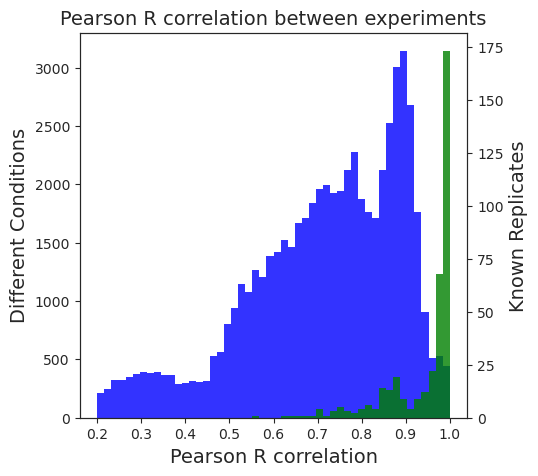

In [16]:
fig,ax = plt.subplots(figsize=(5,5))
ax2 = ax.twinx()
ax2.hist(rep_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='green',linewidth=0)
ax.hist(rand_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='blue',linewidth=0)
ax.set_title('Pearson R correlation between experiments',fontsize=14)
ax.set_xlabel('Pearson R correlation',fontsize=14)
ax.set_ylabel('Different Conditions',fontsize=14)
ax2.set_ylabel('Known Replicates',fontsize=14)

med_corr = np.median([v for k,v in rep_corrs.items()])
print('Median Pearson R between replicates: {:.2f}'.format(med_corr))

Remove samples without any high-correlation replicates

In [17]:
dissimilar = []
for idx, grp in DF_metadata_passed_step4.groupby('full_name'):
    ident = np.identity(len(grp))
    corrs = (DF_log_tpm[grp.index].corr() - ident).max()
    dissimilar.extend(corrs[corrs<rcutoff].index)

# Save this information in both the original metadata dataframe and the new metadata dataframe
DF_metadata_all['passed_replicate_correlations'] = ~DF_metadata_all.index.isin(dissimilar)
DF_metadata_passed_step4['passed_replicate_correlations'] = ~DF_metadata_passed_step4.index.isin(dissimilar)

In [18]:
DF_metadata_final = DF_metadata_passed_step4[DF_metadata_passed_step4['passed_replicate_correlations']]
print('# Samples that passed replicate correlations:',len(DF_metadata_final))

# Samples that passed replicate correlations: 306


## Check that reference conditions still exist
If a reference condition was removed due to poor replicate correlations, a new reference condition needs to be defined.

Again, any samples that fail these checks will be printed below.

In [19]:
project_exprs = []
for name,group in DF_metadata_final.groupby('project'):
    
    # Get reference condition
    ref_cond = group.reference_condition.iloc[0]
    
    # Ensure the reference condition is still in the project
    if ref_cond not in group.condition.tolist():
        print('Reference condition missing from:', name)
    
    # Check that each project has at least two conditions (a reference and at least one test condition)
    if len(group.condition.unique()) <= 1:
        print('Only one condition in:', name)

Reference condition missing from: sRNA_reg
Only one condition in: sRNA_reg
Reference condition missing from: sucrose_glucose_MMS


If necessary, choose a new condition for failed projects and re-run notebook.

## Normalize dataset to reference conditions

In [20]:
DF_log_tpm_final = DF_log_tpm[DF_metadata_final.index]

In [21]:
project_exprs = []
for name,group in DF_metadata_final.groupby('project'):
    
    # Get reference condition
    ref_cond = group.reference_condition.iloc[0]
    
    # Get reference condition sample ids
    ref_samples = group[group.condition == ref_cond].index
    
    # Get reference condition expression
    ref_expr = DF_log_tpm_final[ref_samples].mean(axis=1)
    
    # Subtract reference expression from project
    project_exprs.append(DF_log_tpm_final[group.index].sub(ref_expr,axis=0))

DF_log_tpm_norm = pd.concat(project_exprs,axis=1)

## Save final datasets

In [22]:
logTPM_qc_file = path.join('..','data','processed_data','log_tpm.csv')
logTPM_norm_file = path.join('..','data','processed_data','log_tpm_norm.csv')
final_metadata_file = path.join('..','data','processed_data','metadata.tsv')
final_metadata_all_file = path.join('..','data','interim','metadata_qc_part2_all.tsv')

DF_log_tpm_final.to_csv(logTPM_qc_file)
DF_log_tpm_norm.to_csv(logTPM_norm_file)
DF_metadata_final.to_csv(final_metadata_file, sep='\t')
DF_metadata_all.to_csv(final_metadata_all_file, sep='\t')